In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

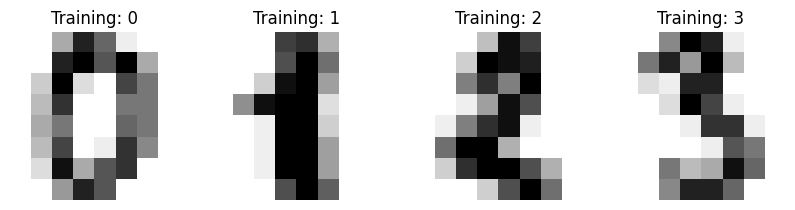

In [3]:
# Load dataset
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier
model = svm.SVC(gamma=0.001)

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.7, shuffle=False
)

# Learn the digits on the train subset
model.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = model.predict(X_test)

In [5]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       123
           1       0.95      0.97      0.96       127
           2       0.98      0.97      0.98       122
           3       0.98      0.91      0.94       128
           4       0.98      0.96      0.97       128
           5       0.94      0.96      0.95       128
           6       0.99      0.98      0.98       128
           7       0.96      1.00      0.98       126
           8       0.93      0.93      0.93       121
           9       0.90      0.94      0.92       127

    accuracy                           0.96      1258
   macro avg       0.96      0.96      0.96      1258
weighted avg       0.96      0.96      0.96      1258




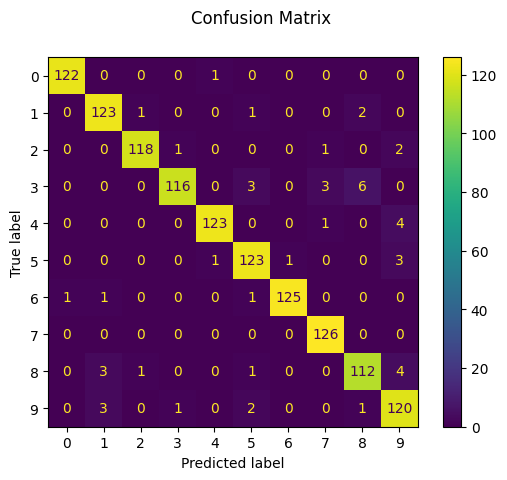

In [6]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

In [7]:
import joblib
joblib.dump(model, r'model.joblib')

['model.joblib']

In [10]:
# Save some examples as images
from PIL import Image
import numpy as np

for i in range(5):
    Image.fromarray(np.uint8(digits.images[i])).save(f'../../../example_data/{digits.target[i]}.png')